In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# make plots look nice
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['lines.linewidth'] = 3
plt.style.use('ggplot')

Import functions I wrote while looking at journalist deaths to deal with columns that list multiple categories for some entries.

In [2]:
# get the unique values for category

def get_unique_category_vals(df, col_name, dropna=False):
    '''
    Find unique category values for specified column in a dataframe, where some rows 
    contain multiple categories separated by commas.
    '''
    unique_entries = list(cpj[col_name].unique())
    unique_entries = list(map(str,unique_entries))
    unique_entries_split = list(map(lambda x: x.split(','),unique_entries))
    unique_vals = set([val for sublist in unique_entries_split for val in sublist])
    if dropna:
        unique_vals.remove('nan')
    return(unique_vals)

#uvals = get_unique_category_vals(cpj,'coverage')
#print(uvals)


def add_category_counts_to_df(df, col_name, dropna=False):
    '''
    Add boolean columns to dataframe for each unique category in col_name indicating if that category 
    was present in col_name. Useful when some rows of col_name contain multiple categories separated by commas.
    Adding these columns allows us to sum/count each individual category separately.
    '''
    df_new = df.copy()
    unique_vals = get_unique_category_vals(df_new, col_name, dropna)
    
    for val in unique_vals:
        df_new[col_name + '_' + val] = df_new[col_name].apply(str).apply(lambda x: x.split(',')).apply(lambda x: val in x)
    return df_new

#df = cpj.copy()
#df=add_category_counts_to_df(df,'coverage')

#df.loc[:,['year','coverage','coverage_War','coverage_Crime']].head()

def count_categories(df, col_name, dropna=False):
    '''
    '''
    df_count=add_category_counts_to_df(df, col_name, dropna)
    df_count=df_count.filter(regex='^' + col_name, axis=1).sum().to_frame(name='Count').reset_index().rename(columns={'index':col_name}).sort_values('Count',ascending=False)
    df_count[col_name]=df_count[col_name].apply(lambda x: x.replace(col_name +'_',''))
    return df_count


def plot_hbar_category_count_multiplecats(df, col_name, topN=None, dropna=False):
    '''
    Make a horizontal bar chart of category counts for a specified column in dataframe
    '''
    df_count = count_categories(df, col_name, dropna)
    fig, ax = plt.subplots(1,figsize=(12,8))
    ax.barh(df_count[col_name], df_count['Count'])
    ax.set_xlabel('# Journalists Imprisoned')
    if topN:
        ax.set_title('# Journalists Imprisoned By ' + col_name + ' (Top ' + str(topN) +')')
    else:
        ax.set_title('# Journalists Imprisoned By ' + col_name)
    ax.invert_yaxis()
    return 



In [3]:
def remove_spaces_in_category_lists(df, col_name):
    '''
    Remove spaces in rows of col_name where a list of categories (separated by commas) is given
    
    Example: ['Camera Operator, Internet Reporter, Print reporter'] > ['Camera Operator,Internet Reporter,Print reporter']
    
    '''
    df[col_name] = df[col_name].apply(lambda x: x.replace(',  ',',') if type(x)==str else x)
    df[col_name] = df[col_name].apply(lambda x: x.replace(', ',',') if type(x)==str else x)
    return df

In [4]:
def category_count_df_one_column(df, col_name, topN=None ,dropna=False):
    '''
    Make dataframe with category counts for a specified column
    
    INPUT
    df : Pandas Dataframe
    col_name : (str) Name of column to count
    drop_na : (bool) (optional) Whether or not to include NaNs in counts
    
    OUTPUT
    df_count : Pandas dataframe with 2 columns: col_name and Count
    '''
    df_count = cpj[col_name].value_counts(dropna).to_frame().reset_index().rename(columns={col_name:'Count','index':col_name})
    if topN:
        df_count = df_count.head(topN)
    return df_count

In [5]:
def plot_hbar_category_count(df, col_name, topN=None, dropna=False):
    '''
    Make a horizontal bar chart of category counts for a specified column in dataframe
    '''
    df_count = category_count_df_one_column(df, col_name, topN, dropna=False)
    fig, ax = plt.subplots(1,figsize=(12,8))
    ax.barh(df_count[col_name], df_count['Count'])
    ax.set_xlabel('# Journalists Imprisoned')
    if topN:
        ax.set_title('# Journalists Imprisoned By ' + col_name + ' (Top ' + str(topN) +')')
    else:
        ax.set_title('# Journalists Imprisoned By ' + col_name)
    ax.invert_yaxis()
    return 

In [6]:
cpj = pd.read_csv('../data/Journalists Imprisoned between 1992 and 2020.csv')
cpj.head()

,year,combinedStatus,fullName,sortName,primaryNationality,secondaryNationality,tertiaryNationality,gender,photoUrl,photoCredit,...,threatened,charges,motive,lengthOfSentence,healthProblems,impCountry,entry,sentenceDate,sentence,locationImprisoned
0,2018,Imprisoned,Aasif Sultan,NaN,India,NaN,NaN,Male,https://cpj-photos.s3.us-west-2.amazonaws.com/...,Muzamil Mattoo/Kashmir Narrator,...,NaN,Anti-state,NaN,Sentence pending,Yes,NaN,NaN,NaN,Not sentenced,NaN
1,2019,Imprisoned,Aasif Sultan,NaN,India,NaN,NaN,Male,https://cpj-photos.s3.us-west-2.amazonaws.com/...,Muzamil Mattoo/Kashmir Narrator,...,NaN,Anti-state,NaN,Sentence pending,Yes,NaN,NaN,NaN,Not sentenced,NaN
2,1997,Imprisoned,Abay Hailu,NaN,Ethiopia,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,1 year to <5 years,Yes,NaN,NaN,NaN,1 year,NaN
3,1993,Imprisoned,Abbas Abdi,NaN,Iran,NaN,NaN,Male,NaN,NaN,...,NaN,NaN,NaN,1 year to <5 years,No,NaN,NaN,NaN,1 year,NaN
4,2011,Imprisoned,Abd al-Karim Thail,NaN,Yemen,NaN,NaN,Male,NaN,NaN,...,NaN,No Charge,NaN,Not Sentenced,No,NaN,NaN,NaN,Not Sentenced,NaN


In [7]:
cpj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      4854 non-null   int64  
 1   combinedStatus            4854 non-null   object 
 2   fullName                  4854 non-null   object 
 3   sortName                  0 non-null      float64
 4   primaryNationality        4838 non-null   object 
 5   secondaryNationality      29 non-null     object 
 6   tertiaryNationality       0 non-null      float64
 7   gender                    4774 non-null   object 
 8   photoUrl                  526 non-null    object 
 9   photoCredit               529 non-null    object 
 10  type                      4854 non-null   object 
 11  lastStatus                1156 non-null   object 
 12  typeOfDeath               0 non-null      float64
 13  status                    4854 non-null   object 
 14  employed

First drop any columns with all nulls

In [8]:
cpj.dropna(axis=1, how='all', inplace=True)
cpj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  4854 non-null   int64 
 1   combinedStatus        4854 non-null   object
 2   fullName              4854 non-null   object
 3   primaryNationality    4838 non-null   object
 4   secondaryNationality  29 non-null     object
 5   gender                4774 non-null   object
 6   photoUrl              526 non-null    object
 7   photoCredit           529 non-null    object
 8   type                  4854 non-null   object
 9   lastStatus            1156 non-null   object
 10  status                4854 non-null   object
 11  employedAs            4088 non-null   object
 12  organizations         4814 non-null   object
 13  jobs                  4726 non-null   object
 14  coverage              4115 non-null   object
 15  mediums               4753 non-null   

Also drop any columns with less than 1000 non-null values

In [9]:
cpj.dropna(axis=1, thresh=1000, inplace=True)
cpj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                4854 non-null   int64 
 1   combinedStatus      4854 non-null   object
 2   fullName            4854 non-null   object
 3   primaryNationality  4838 non-null   object
 4   gender              4774 non-null   object
 5   type                4854 non-null   object
 6   lastStatus          1156 non-null   object
 7   status              4854 non-null   object
 8   employedAs          4088 non-null   object
 9   organizations       4814 non-null   object
 10  jobs                4726 non-null   object
 11  coverage            4115 non-null   object
 12  mediums             4753 non-null   object
 13  country             4854 non-null   object
 14  localOrForeign      4854 non-null   object
 15  charges             4676 non-null   object
 16  lengthOfSentence    4476

We have 3 status fields: 'combinedStatus', 'lastStatus', and 'status'. None of them seem really useful, basically every row has a status of imprisoned. So drop these columns too.

In [10]:
cpj['combinedStatus'].value_counts()

Imprisoned    4853
imprisoned       1
Name: combinedStatus, dtype: int64

In [11]:
cpj['lastStatus'].value_counts()

Imprisoned    1145
Killed          11
Name: lastStatus, dtype: int64

In [12]:
cpj['status'].value_counts()

Imprisoned    4853
imprisoned       1
Name: status, dtype: int64

In [13]:
cpj.drop(['combinedStatus','lastStatus','status'], axis=1, inplace=True)
cpj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                4854 non-null   int64 
 1   fullName            4854 non-null   object
 2   primaryNationality  4838 non-null   object
 3   gender              4774 non-null   object
 4   type                4854 non-null   object
 5   employedAs          4088 non-null   object
 6   organizations       4814 non-null   object
 7   jobs                4726 non-null   object
 8   coverage            4115 non-null   object
 9   mediums             4753 non-null   object
 10  country             4854 non-null   object
 11  localOrForeign      4854 non-null   object
 12  charges             4676 non-null   object
 13  lengthOfSentence    4476 non-null   object
 14  healthProblems      4853 non-null   object
 15  sentence            4480 non-null   object
 16  locationImprisoned  1256

Unlike the journalist deaths data, we actually have gender info for a majority of rows. Probably this distribution in some part reflects the underlying distribution of gender in journalism, but hard to say for sure. I don't have data on the gender distribution of all journalists.

In [14]:
cpj['gender'].value_counts()

Male      4379
Female     395
Name: gender, dtype: int64

The 'type' field is useless since it only contains 1 unique value, drop that too.

In [15]:
cpj['type'].value_counts()

Journalist    4854
Name: type, dtype: int64

In [16]:
cpj.drop('type', axis=1, inplace=True)
cpj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                4854 non-null   int64 
 1   fullName            4854 non-null   object
 2   primaryNationality  4838 non-null   object
 3   gender              4774 non-null   object
 4   employedAs          4088 non-null   object
 5   organizations       4814 non-null   object
 6   jobs                4726 non-null   object
 7   coverage            4115 non-null   object
 8   mediums             4753 non-null   object
 9   country             4854 non-null   object
 10  localOrForeign      4854 non-null   object
 11  charges             4676 non-null   object
 12  lengthOfSentence    4476 non-null   object
 13  healthProblems      4853 non-null   object
 14  sentence            4480 non-null   object
 15  locationImprisoned  1256 non-null   object
dtypes: int64(1), object(15)


The 'employedAs' column has 2 different spellings of 'staff'; fix these. Not sure how useful this column will be.

In [17]:
cpj['employedAs'].value_counts()

Staff        2788
Freelance    1298
staff           2
Name: employedAs, dtype: int64

In [18]:
cpj['employedAs'] = cpj['employedAs'].apply(lambda x: x.replace('staff','Staff') if type(x)==str else x)
cpj['employedAs'].value_counts()

Staff        2790
Freelance    1298
Name: employedAs, dtype: int64

In [19]:
cpj['organizations'].value_counts()

Freelance                    1129
Al-Nida                        86
Radio Bana                     64
Setit                          64
Uighurbiz                      59
                             ... 
Palestine Post                  1
Yashmagh, Yarpagh, Dilmaj       1
Ghion Magazine                  1
Agiere, Welafen                 1
Xeberman, Press-az              1
Name: organizations, Length: 843, dtype: int64

The 'jobs', 'coverage', 'mediums', and 'charges' columns have the same issue as in the journalist deaths data, where some rows list multiple columns. We can use the functions I wrote for that data set to get counts for these types of columns. There are also a couple issues with categories being spelled different ways that need to be fixed.

In [20]:
cpj['jobs'].value_counts()

Editor                                                                                            805
Print reporter                                                                                    719
Internet Reporter                                                                                 532
Columnist/Commentator                                                                             512
Publisher/Owner                                                                                   398
                                                                                                 ... 
Broadcast Reporter, Internet Reporter, Photographer, Print reporter, Producer, Publisher/Owner      1
Editor, Internet Reporter, Photographer, Print Reporter                                             1
Columnist/Commentator, Photographer                                                                 1
Documentary Filmmaker, Internet Reporter                                          

Get unique values from 'jobs' column; note multiple spellings of several categories

In [21]:
get_unique_category_vals(cpj, 'jobs', dropna=False)

{'  Print Reporter',
 ' Broadcast reporter',
 ' Camera Operator',
 ' Columnist/Commentator',
 ' Documentary Filmmaker',
 ' Documentary filmmaker',
 ' Editor',
 ' Internet Reporter',
 ' Internet reporter',
 ' Photographer',
 ' Print Reporter',
 ' Print reporter',
 ' Producer',
 ' Publisher/Owner',
 ' Publisher/owner',
 ' Technician',
 ' print reporter',
 'Broadcast Reporter',
 'Broadcast reporter',
 'Camera Operator',
 'Camera operator',
 'Columnist',
 'Columnist/Commentator',
 'Columnist/commentator',
 'Distributor',
 'Documentary Filmmaker',
 'Editor',
 'Internet Reporter',
 'Internet reporter',
 'Owner/Publisher',
 'Photographer',
 'Print Reporter',
 'Print reporter',
 'Producer',
 'Publisher/Owner',
 'Publisher/owner',
 'Reporter',
 'Technician',
 'Unknown',
 'nan'}

In [22]:
# first get rid of extra spaces in lists of categories
cpj = remove_spaces_in_category_lists(cpj, 'jobs')
get_unique_category_vals(cpj, 'jobs', dropna=False)

{' Broadcast reporter',
 ' Editor',
 'Broadcast Reporter',
 'Broadcast reporter',
 'Camera Operator',
 'Camera operator',
 'Columnist',
 'Columnist/Commentator',
 'Columnist/commentator',
 'Distributor',
 'Documentary Filmmaker',
 'Documentary filmmaker',
 'Editor',
 'Internet Reporter',
 'Internet reporter',
 'Owner/Publisher',
 'Photographer',
 'Print Reporter',
 'Print reporter',
 'Producer',
 'Publisher/Owner',
 'Publisher/owner',
 'Reporter',
 'Technician',
 'Unknown',
 'nan',
 'print reporter'}

In [23]:
cpj['jobs'] = cpj['jobs'].apply(lambda x: x.replace('print reporter','Print Reporter') if type(x)==str else x)
cpj['jobs'] = cpj['jobs'].apply(lambda x: x.replace('Print reporter','Print Reporter') if type(x)==str else x)
cpj['jobs'] = cpj['jobs'].apply(lambda x: x.replace('Broadcast reporter','Broadcast Reporter') if type(x)==str else x)
cpj['jobs'] = cpj['jobs'].apply(lambda x: x.replace(' Broadcast Reporter','Broadcast Reporter') if type(x)==str else x)
cpj['jobs'] = cpj['jobs'].apply(lambda x: x.replace('Publisher/owner','Publisher/Owner') if type(x)==str else x)
cpj['jobs'] = cpj['jobs'].apply(lambda x: x.replace('Internet reporter','Internet Reporter') if type(x)==str else x)
cpj['jobs'] = cpj['jobs'].apply(lambda x: x.replace('Documentary filmmaker','Documentary Filmmaker') if type(x)==str else x)
cpj['jobs'] = cpj['jobs'].apply(lambda x: x.replace('Columnist/commentator','Columnist/Commentator') if type(x)==str else x)
cpj['jobs'] = cpj['jobs'].apply(lambda x: x.replace(' Editor','Editor') if type(x)==str else x)
cpj['jobs'] = cpj['jobs'].apply(lambda x: x.replace('Camera operator','Camera Operator') if type(x)==str else x)

get_unique_category_vals(cpj, 'jobs', dropna=False)

{'Broadcast Reporter',
 'Camera Operator',
 'Columnist',
 'Columnist/Commentator',
 'Distributor',
 'Documentary Filmmaker',
 'Editor',
 'Internet Reporter',
 'Owner/Publisher',
 'Photographer',
 'Print Reporter',
 'Producer',
 'Publisher/Owner',
 'Reporter',
 'Technician',
 'Unknown',
 'nan'}

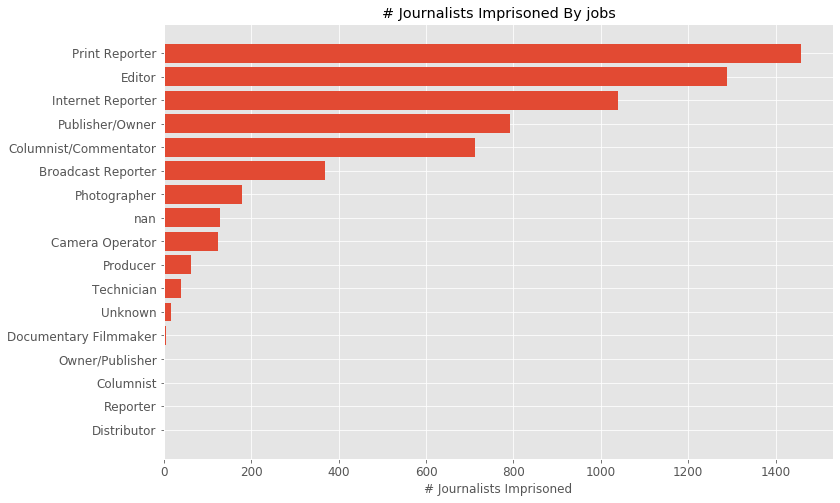

In [24]:
plot_hbar_category_count_multiplecats(cpj, 'jobs')

In [25]:
cpj['coverage'].value_counts()

Politics                                                            1539
Human Rights, Politics                                               443
Unknown                                                              201
Corruption, Politics                                                 178
Culture, Politics                                                    178
                                                                    ... 
Corruption, Culture, Politics, Sports                                  1
Business, Corruption, Crime, Human Rights, Politics, Sports, War       1
Crime, War                                                             1
Corruption,Culture,Politics                                            1
Business, Crime, Culture, Politics, Sports                             1
Name: coverage, Length: 100, dtype: int64

In [26]:
cpj = remove_spaces_in_category_lists(cpj, 'coverage')
get_unique_category_vals(cpj, 'coverage', dropna=False)

{'Business',
 'Corruption',
 'Crime',
 'Culture',
 'Human Rights',
 'Human Rights`',
 'Human rights',
 'Politics',
 'Sports',
 'Unknown',
 'War',
 'nan',
 'politics',
 'sports'}

In [27]:
cpj['coverage'] = cpj['coverage'].apply(lambda x: x.replace('Human rights','Human Rights') if type(x)==str else x)
cpj['coverage'] = cpj['coverage'].apply(lambda x: x.replace('Human Rights`','Human Rights') if type(x)==str else x)
cpj['coverage'] = cpj['coverage'].apply(lambda x: x.replace('politics','Politics') if type(x)==str else x)
cpj['coverage'] = cpj['coverage'].apply(lambda x: x.replace('sports','Sports') if type(x)==str else x)
get_unique_category_vals(cpj, 'coverage', dropna=False)

{'Business',
 'Corruption',
 'Crime',
 'Culture',
 'Human Rights',
 'Politics',
 'Sports',
 'Unknown',
 'War',
 'nan'}

In [28]:
cpj['coverage'].value_counts()

Politics                                           1539
Human Rights,Politics                               488
Unknown                                             201
Corruption,Politics                                 185
Culture,Politics                                    183
                                                   ... 
Culture,Politics,Sports                               1
Business,Corruption,Crime,Human Rights,Politics       1
Human Rights,Politics,Sports,War                      1
Crime,Culture                                         1
Crime,War                                             1
Name: coverage, Length: 81, dtype: int64

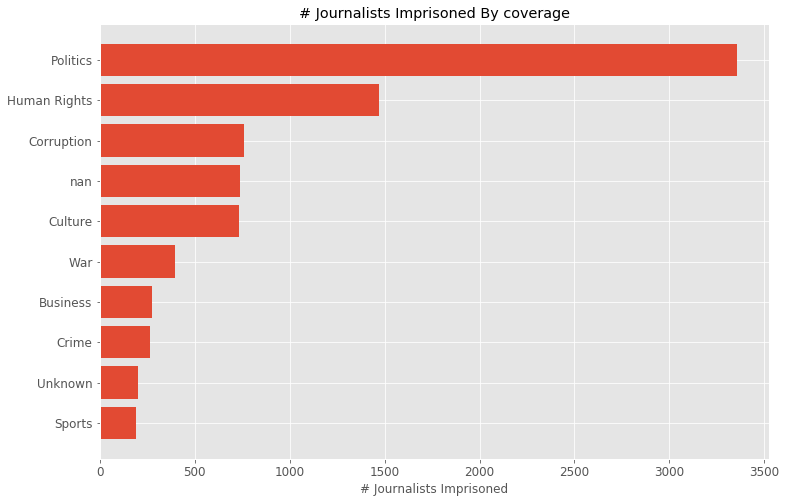

In [29]:
plot_hbar_category_count_multiplecats(cpj, 'coverage')

In [30]:
cpj['mediums'].value_counts()

Print                                                   2403
Internet                                                1326
Internet, Print                                          331
Radio                                                    204
Television                                               144
Print, Internet                                           56
Internet, Television                                      44
Internet, Radio                                           43
Print, Radio, Television                                  38
Documentary Film                                          32
Print, Radio                                              16
Radio, Television                                         15
Documentary Film, Internet, Television                    14
Documentary Film, Internet                                14
Internet, Print, Television                               13
Radio, Print                                               9
Documentary Film, Print 

In [31]:
cpj = remove_spaces_in_category_lists(cpj, 'mediums')
cpj['mediums'] = cpj['mediums'].apply(lambda x: x.replace('print','Print') if type(x)==str else x)
get_unique_category_vals(cpj, 'mediums', dropna=False)

{'Broadcast',
 'Documentary Film',
 'Internet',
 'Print',
 'Radio',
 'Television',
 'Unknown',
 'nan'}

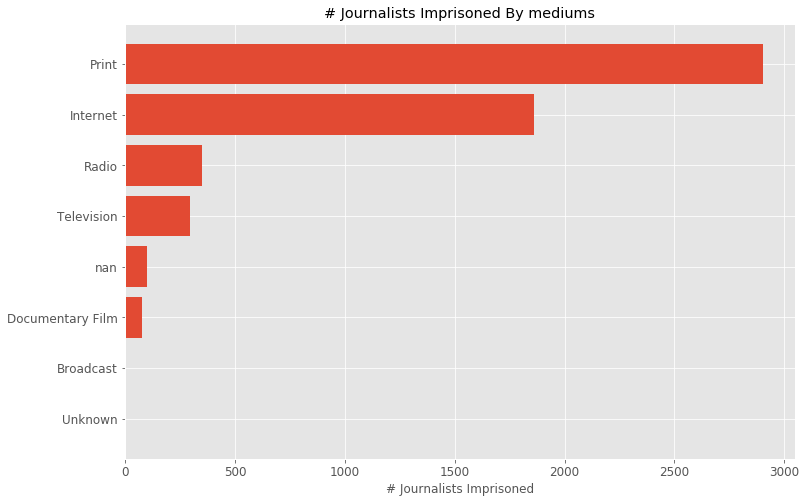

In [32]:
plot_hbar_category_count_multiplecats(cpj, 'mediums')

In [33]:
cpj['charges'].value_counts()

Anti-State                                             2212
Anti-state                                              754
No charge disclosed                                     381
Retaliatory                                             352
No Charge                                               303
Defamation                                              104
No charge                                               103
Anti-state, False News                                   77
Anti-state, Retaliatory                                  50
Anti-State, Retaliatory                                  39
Anti-State, False News                                   36
False News                                               31
Censorship Violation                                     27
Ethnic/Religious Insult                                  25
Ethnic or religious insult                               19
Anti-state, Defamation                                   18
Anti-State, Defamation                  

In [34]:
cpj = remove_spaces_in_category_lists(cpj, 'charges')

cpj['charges'] = cpj['charges'].apply(lambda x: x.replace('False news','False News') if type(x)==str else x)
cpj['charges'] = cpj['charges'].apply(lambda x: x.replace('false news','False News') if type(x)==str else x)
cpj['charges'] = cpj['charges'].apply(lambda x: x.replace('Censorship violation','Censorship Violation') if type(x)==str else x)
cpj['charges'] = cpj['charges'].apply(lambda x: x.replace('No charge','No Charge') if type(x)==str else x)
cpj['charges'] = cpj['charges'].apply(lambda x: x.replace('No Charge disclosed','No Charge') if type(x)==str else x)
cpj['charges'] = cpj['charges'].apply(lambda x: x.replace('Ethnic/Religious Insult','Ethnic or Religious Insult') if type(x)==str else x)
cpj['charges'] = cpj['charges'].apply(lambda x: x.replace('Ethnic or religious insult','Ethnic or Religious Insult') if type(x)==str else x)
cpj['charges'] = cpj['charges'].apply(lambda x: x.replace('Religious or ethnic insult','Ethnic or Religious Insult') if type(x)==str else x)
cpj['charges'] = cpj['charges'].apply(lambda x: x.replace('retaliatory','Retaliatory') if type(x)==str else x)
cpj['charges'] = cpj['charges'].apply(lambda x: x.replace('Anti-state','Anti-State') if type(x)==str else x)

get_unique_category_vals(cpj, 'charges', dropna=False)

{'',
 'Anti-State',
 'Censorship Violation',
 'Defamation',
 'Ethnic or Religious Insult',
 'False News',
 'No Charge',
 'Retaliatory',
 'nan'}

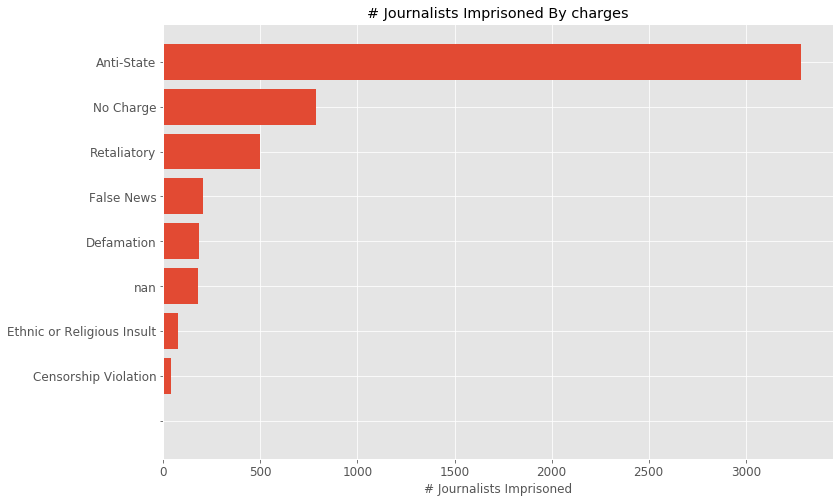

In [35]:
plot_hbar_category_count_multiplecats(cpj, 'charges')

In [36]:
cpj['country'].value_counts()

China           952
Turkey          794
Eritrea         439
Iran            327
Myanmar         244
               ... 
Burkina Faso      1
Yugoslavia        1
Brazil            1
Ghana             1
Tanzania          1
Name: country, Length: 93, dtype: int64

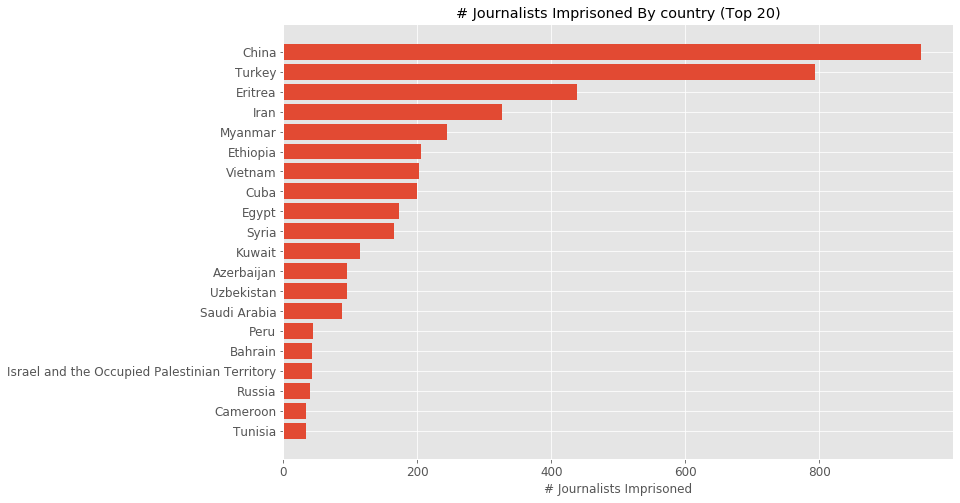

In [37]:
plot_hbar_category_count(cpj, 'country', 20)


In [38]:
cpj['localOrForeign'].value_counts()

Local      4729
Foreign     125
Name: localOrForeign, dtype: int64

The 'lengthOfSentence' column contains a couple values with multiple spellings. We also have categories that seem to be almost the same; for example we have '5 years to <10 years' and '5-10 years'. 

In [39]:
cpj['lengthOfSentence'].value_counts()

10+ years               1354
Not Sentenced            823
1 year to <5 years       635
Sentence pending         560
5 years to <10 years     539
5-10 years               231
Life                     100
<1 year                   60
10+ Years                 50
0-5 years                 50
Death                     22
0-5 Years                 21
5-10 Years                17
Not sentenced             12
not Sentenced              2
Name: lengthOfSentence, dtype: int64

In [51]:
cpj['lengthOfSentence'] = cpj['lengthOfSentence'].apply(lambda x: x.replace('Not sentenced','Not Sentenced') if type(x)==str else x)
cpj['lengthOfSentence'] = cpj['lengthOfSentence'].apply(lambda x: x.replace('not sentenced','Not Sentenced') if type(x)==str else x)
cpj['lengthOfSentence'] = cpj['lengthOfSentence'].apply(lambda x: x.replace('not Sentenced','Not Sentenced') if type(x)==str else x)
cpj['lengthOfSentence'] = cpj['lengthOfSentence'].apply(lambda x: x.replace('5-10 years','5-10 Years') if type(x)==str else x)
cpj['lengthOfSentence'] = cpj['lengthOfSentence'].apply(lambda x: x.replace('0-5 years','0-5 Years') if type(x)==str else x)
cpj['lengthOfSentence'] = cpj['lengthOfSentence'].apply(lambda x: x.replace('0-5 years','0-5 Years') if type(x)==str else x)
cpj['lengthOfSentence'] = cpj['lengthOfSentence'].apply(lambda x: x.replace('10+ years','10+ Years') if type(x)==str else x)
cpj['lengthOfSentence'] = cpj['lengthOfSentence'].apply(lambda x: x.replace('5 years to <10 years','5-10 Years') if type(x)==str else x)
cpj['lengthOfSentence'] = cpj['lengthOfSentence'].apply(lambda x: x.replace('1 year to <5 years','0-5 Years') if type(x)==str else x)
cpj['lengthOfSentence'] = cpj['lengthOfSentence'].apply(lambda x: x.replace('<1 year','0-5 Years') if type(x)==str else x)
cpj['lengthOfSentence'].value_counts()

10+ Years           1404
Not Sentenced        837
5-10 Years           787
0-5 Years            766
Sentence pending     560
Life                 100
Death                 22
Name: lengthOfSentence, dtype: int64

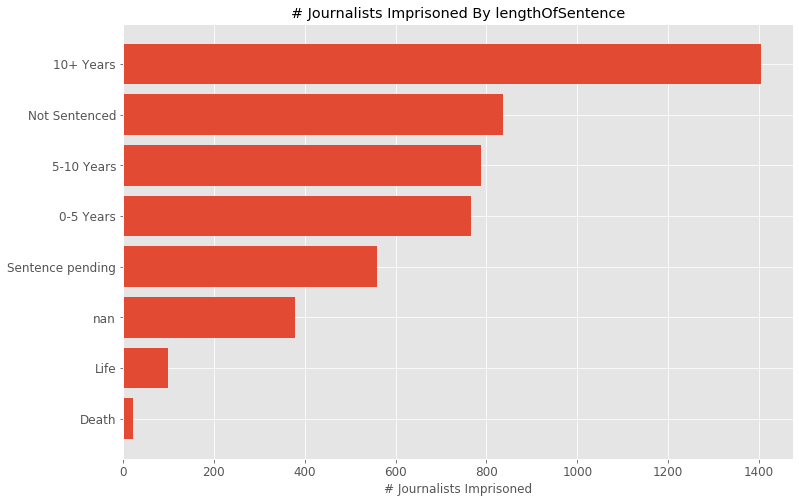

In [52]:
plot_hbar_category_count_multiplecats(cpj, 'lengthOfSentence')

In [42]:
cpj['healthProblems'].value_counts()

No     3676
Yes    1176
no        1
Name: healthProblems, dtype: int64

In [43]:
cpj['healthProblems'] = cpj['healthProblems'].apply(lambda x: x.replace('no','No') if type(x)==str else x)
cpj['healthProblems'].value_counts()

No     3677
Yes    1176
Name: healthProblems, dtype: int64

It seems like the 'sentence' column might not be that useful; might be more usefull to use the binned sentence categories in 'lengthOfSentence'. Could probably write some code to convert the 'sentence' strings into numeric value (years), but I don't think it's worth it right now.

In [44]:
cpj['sentence'].value_counts()

Not Sentenced              994
Not sentenced              397
10 years                   289
3 years                    219
15 years                   199
                          ... 
Acquitted                    1
12 years 9 months            1
Seven years, six months      1
3 years 4 months             1
30 Days                      1
Name: sentence, Length: 111, dtype: int64

In [45]:
cpj['locationImprisoned'].value_counts()

Unknown                                            421
Istanbul                                           142
Cairo                                               58
Jaw                                                 35
Urumqi, Xinjiang                                    27
                                                  ... 
Wang Saphung Police Station, Loei Province           1
The Brazzaville house of arrest                      1
Ait Melloul prison, Souss-Massa region, Morocco      1
Izabal                                               1
Santa Elena                                          1
Name: locationImprisoned, Length: 102, dtype: int64

In [46]:
cpj.groupby(['country','locationImprisoned']).count().loc[:,['year']].head(20)

year
country    locationImprisoned              
Algeria    Algiers' El-Harrach Prison     1
           Unknown                        2
Azerbaijan Baku                          27
           Gobustan, Baku region          8
           Sheki                          3
Bahrain    Jaw                           35
Bangladesh Mymensingh Central Jail        2
           Unknown                        5
Cambodia   Phnom Penh                     2
Cameroon   Unknown                        3
China      Changchun, Jilin               7
           Changji, Xinjiang             11
           Chengdu, Sichuan              11
           Chongqing, Sichuan             5
           Chuanzhong, Sichuan           10
           Dali, Yunnan province          4
           Dongguan, Guangdong            7
           Hangzhou, Hangzhou             6
           Huanggang, Hubei              10
           Huzhou, Zhejiang               6

Text(0.5, 1.0, '# Journalists Imprisoned Per Year')

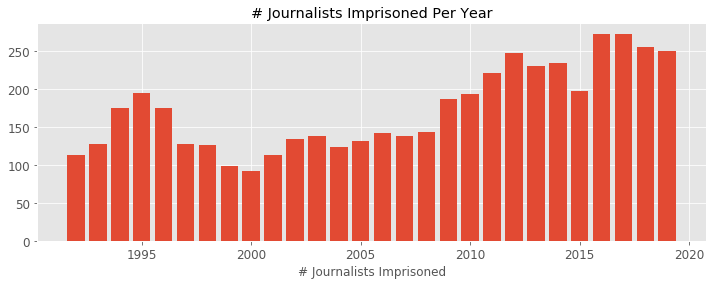

In [53]:
# Plot Number of Journalists imprisoned per year
cpj_GB_year_count = category_count_df_one_column(cpj,'year')

_, ax = plt.subplots(1,figsize=(12,4))
ax.bar(cpj_GB_year_count['year'],cpj_GB_year_count['Count'])
ax.set_xlabel('Year')
ax.set_xlabel('# Journalists Imprisoned')
ax.set_title('# Journalists Imprisoned Per Year')